In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
# Load your sample data
df = pd.read_csv(r'C:/Users/cambr/Dropbox/GIS_Data_Application/locations.csv')  

In [23]:
# Provide the path to the .shp file in your directory
watersheds = gpd.read_file('C:\Users\cambr\Dropbox\GIS_Data_Application\OWBTERT\LIO-2023-01-26\ONT_WSHED_BDRY_TERT_DERIVED.shp') 


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2842415077.py, line 2)

In [7]:
import geopandas as gpd

In [8]:
# Load the shapefile
df = gpd.read_file(r'C:\Users\cambr\Dropbox\GIS_Data_Application\US_Landuse_Shapefile.shp')

In [9]:

print(df.columns)



Index(['fid', 'DN', 'OGF_ID', 'NAME', 'CODE', 'AREA_HA', 'OBJECTID',
       'PERIMETER', 'HUC', 'HUC14', 'SHED_ID', 'BASIN', 'SUB', 'DRAIN_TO',
       'WCOURSE', 'OUTLET', 'SEC', 'TN', 'RNG', 'CO', 'AREA_MI', 'TDA_MI',
       'Shape_STAr', 'Shape_STLe', 'ReferenceC', 'ShapeSTAre', 'ShapeSTLen',
       'WSHED_NAME', 'PWS_STATUS', 'NPS_PRIORI', 'WSHED_CODE', 'WATERSHED_',
       'WATERSHE_1', 'TOTAL_STRE', 'TOTAL_LAKE', 'TOTAL_WETL', 'NPS_OVERAL',
       'NPS_OVER_1', 'NPS_STREAM', 'NPS_STRE_1', 'NPS_LAKE_R', 'NPS_LAKE_1',
       'NPS_GW_RAN', 'NPS_GW_R_1', 'layer', 'path', 'Area', 'Area_1',
       'geometry'],
      dtype='object')


In [10]:
# Group by watershed and landuse and sum the areas
grouped = df.groupby(['OBJECTID', 'DN'])['Area'].sum().reset_index()



In [11]:
# Calculate the total area for each watershed
total_area = df.groupby('OBJECTID')['Area'].sum()



In [12]:
print(total_area)

OBJECTID
640     5.507934e+08
1729    9.889665e+07
1787    6.055791e+08
2075    4.759724e+08
2098    1.343827e+08
2208    9.472157e+07
Name: Area, dtype: float64


In [13]:
# Calculate the percentage area for each landuse
grouped['percentage'] = grouped.apply(lambda row: (row['Area'] / total_area[row['OBJECTID']]) * 100, axis=1)

print(grouped)

     OBJECTID   DN          Area  percentage
0         640    0  3.491247e+03    0.000634
1         640    1  6.003576e+07   10.899869
2         640    4  3.731304e+04    0.006774
3         640    5  4.039892e+07    7.334677
4         640    6  1.496850e+04    0.002718
..        ...  ...           ...         ...
178      2208  143  1.737572e+07   18.343997
179      2208  152  4.650939e+05    0.491012
180      2208  176  1.018552e+07   10.753119
181      2208  190  3.582654e+06    3.782300
182      2208  195  1.384927e+07   14.621034

[183 rows x 4 columns]


In [15]:
# Define the mapping for specified codes
code_to_landcover = {
    61: "Fallow/Idle Cropland",
    62: "Pasture/Grass",
    63: "Forest",
    64: "Shrubland",
    65: "Barren",
    # Add mappings for 66-80 as per your data (not provided in your list)
    81: "Clouds/No Data",
    82: "Developed",
    83: "Water",
    87: "Wetlands",
    88: "Nonag/Undefined",
    92: "Aquaculture",
    111: "Open Water",
    112: "Perennial Ice/Snow",
    121: "Developed/Open Space",
    122: "Developed/Low Intensity",
    123: "Developed/Med Intensity",
    124: "Developed/High Intensity",
    131: "Barren",
    141: "Deciduous Forest",
    142: "Evergreen Forest",
    143: "Mixed Forest",
    152: "Shrubland",
    176: "Grassland/Pasture",
    190: "Woody Wetlands",
    195: "Herbaceous Wetlands"
}


In [16]:

# Function to get land cover name
def get_landcover_name(code):
    return code_to_landcover.get(code, "Agriculture")


In [17]:

# Create the new column
df['landcover_name'] = df['DN'].apply(get_landcover_name)


       fid   DN OGF_ID  NAME  CODE AREA_HA  OBJECTID    PERIMETER        HUC  \
0  85143.0  143   None  None  None    None      1787  59106.51283  4030109.0   
1  85132.0  190   None  None  None    None      1787  59106.51283  4030109.0   
2  85144.0  143   None  None  None    None      1787  59106.51283  4030109.0   
3  85145.0  190   None  None  None    None      1787  59106.51283  4030109.0   
4  85168.0  141   None  None  None    None      1787  59106.51283  4030109.0   

          HUC14  ... NPS_LAKE_R NPS_LAKE_1  NPS_GW_RAN  NPS_GW_R_1  \
0  4.030109e+12  ...       None       None        None        None   
1  4.030109e+12  ...       None       None        None        None   
2  4.030109e+12  ...       None       None        None        None   
3  4.030109e+12  ...       None       None        None        None   
4  4.030109e+12  ...       None       None        None        None   

            layer                                               path  \
0  watershed_10.1  C:\User

In [18]:

# Optional: Check the DataFrame
print(df.head())
print(df.columns)

       fid   DN OGF_ID  NAME  CODE AREA_HA  OBJECTID    PERIMETER        HUC  \
0  85143.0  143   None  None  None    None      1787  59106.51283  4030109.0   
1  85132.0  190   None  None  None    None      1787  59106.51283  4030109.0   
2  85144.0  143   None  None  None    None      1787  59106.51283  4030109.0   
3  85145.0  190   None  None  None    None      1787  59106.51283  4030109.0   
4  85168.0  141   None  None  None    None      1787  59106.51283  4030109.0   

          HUC14  ... NPS_LAKE_R NPS_LAKE_1  NPS_GW_RAN  NPS_GW_R_1  \
0  4.030109e+12  ...       None       None        None        None   
1  4.030109e+12  ...       None       None        None        None   
2  4.030109e+12  ...       None       None        None        None   
3  4.030109e+12  ...       None       None        None        None   
4  4.030109e+12  ...       None       None        None        None   

            layer                                               path  \
0  watershed_10.1  C:\User

In [17]:

import seaborn as sns


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
import contextily as ctx



In [27]:


# Group by OBJECTID and landcover_name and sum the areas
grouped = df.groupby(['OBJECTID', 'landcover_name'])['Area'].sum().reset_index()


In [28]:

# Calculate the total area for each OBJECTID
total_area = df.groupby('OBJECTID')['Area'].sum()


In [77]:


# Ensure the data is in Web Mercator projection
df = df.to_crs(epsg=3857)


In [80]:
import contextily as ctx

# Plot the data
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot the OBJECTID
for idx, row in df.iterrows():
    ax.annotate(row['OBJECTID'], (row.geometry.centroid.x, row.geometry.centroid.y), color='red')

# Remove axis
ax.axis('off')

plt.show()

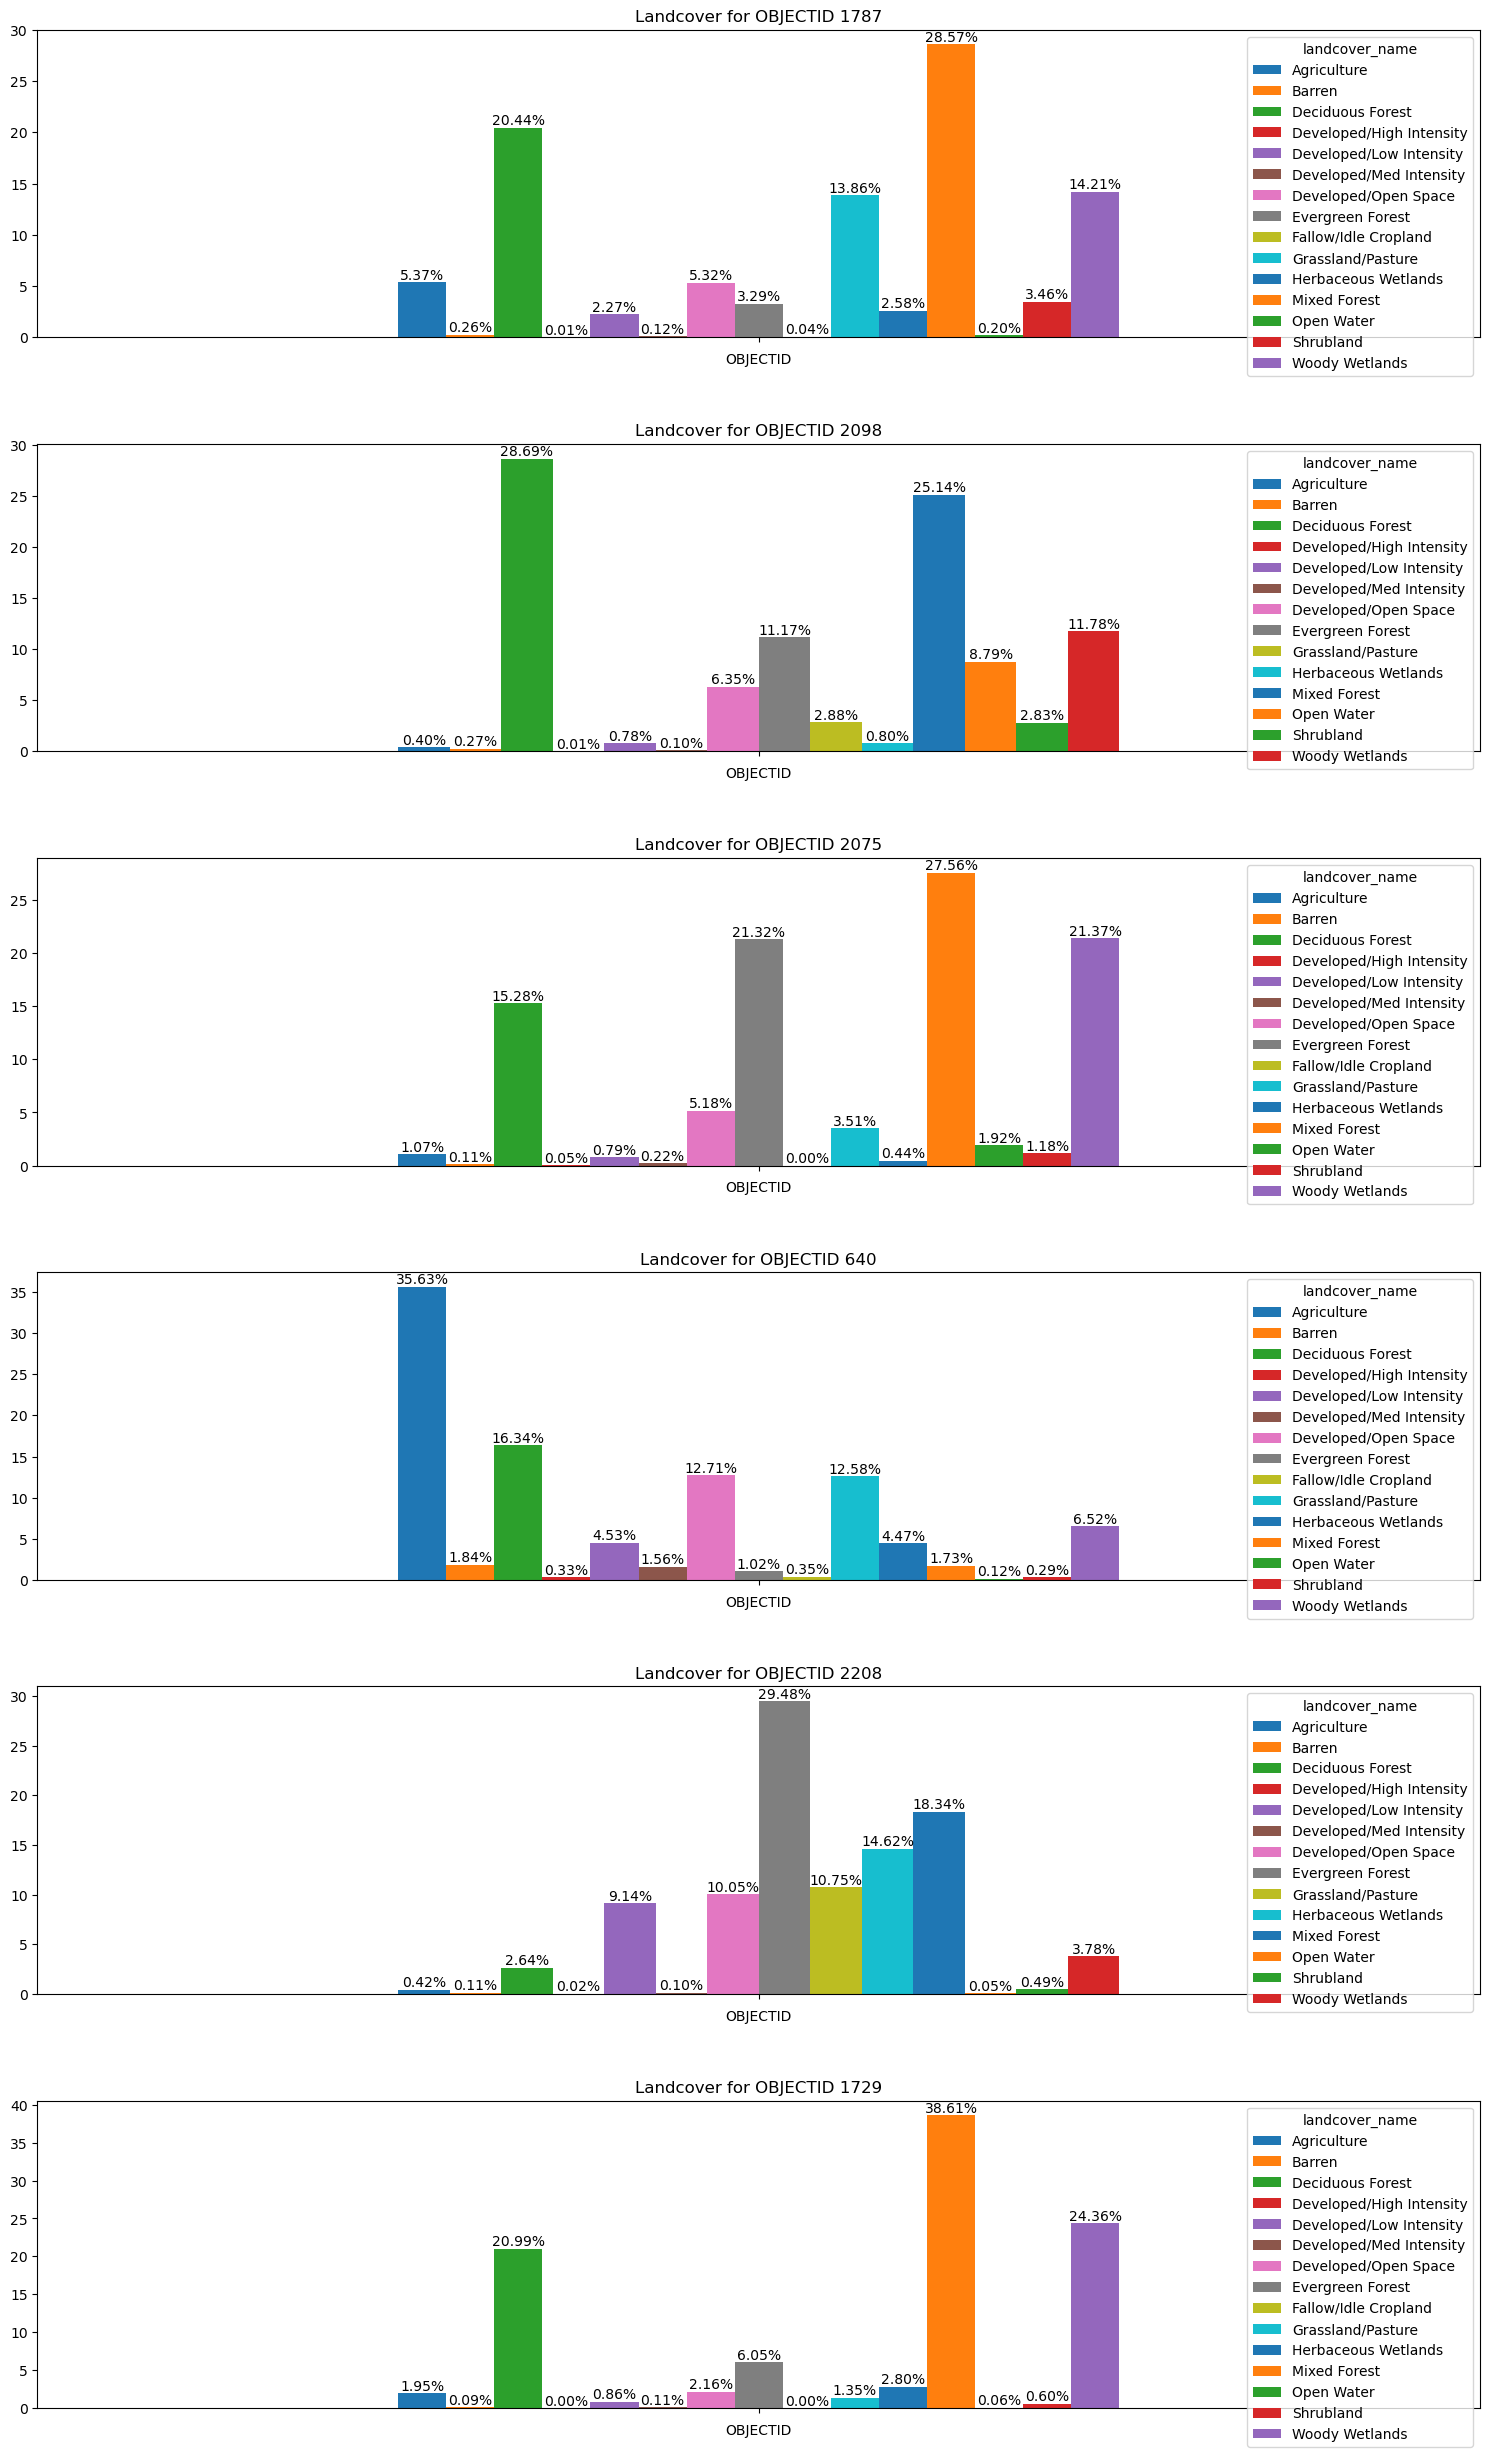

In [76]:
import matplotlib.pyplot as plt

# Group by OBJECTID and landcover_name and sum the areas
grouped = df.groupby(['OBJECTID', 'landcover_name'])['Area'].sum().reset_index()

# Calculate the total area for each OBJECTID
total_area = df.groupby('OBJECTID')['Area'].sum()

# Calculate the percentage area for each landcover_name
grouped['percentage'] = grouped.apply(lambda row: (row['Area'] / total_area[row['OBJECTID']]) * 100, axis=1)

# Create a 1 x 6 panel plot
fig, axs = plt.subplots(6, 1, figsize=(15, 25))

# Iterate over the subplots and plot each bar chart
for i, ax in enumerate(axs):
    # Filter the data for the current OBJECTID
    obj_id = df['OBJECTID'].unique()[i]
    data = grouped[grouped['OBJECTID'] == obj_id]
    
    # Pivot the data and create a bar chart
    pivot_data = data.pivot(index='OBJECTID', columns='landcover_name', values='percentage')
    pivot_data.plot(kind='bar', ax=ax, legend=True)  # Include the legend
    
    # Set the title for each subplot
    ax.set_title(f'Landcover for OBJECTID {obj_id}')
    
    # Remove x-axis labels
    ax.set_xticklabels([])
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [47]:


# Define the colors for each landcover name
colors = {
    "Fallow/Idle Cropland": "tab:blue",
    "Pasture/Grass": "tab:green",
    "Forest": "tab:orange",
    "Shrubland": "tab:red",
    "Barren": "tab:purple",
    "Clouds/No Data": "tab:brown",
    "Developed": "tab:pink",
    "Water": "tab:gray",
    "Wetlands": "tab:olive",
    "Nonag/Undefined": "tab:cyan",
    "Aquaculture": "tab:blue",
    "Open Water": "tab:green",
    "Perennial Ice/Snow": "tab:orange",
    "Developed/Open Space": "tab:red",
    "Developed/Low Intensity": "tab:purple",
    "Developed/Med Intensity": "tab:brown",
    "Developed/High Intensity": "tab:pink",
    "Deciduous Forest": "tab:gray",
    "Evergreen Forest": "tab:olive",
    "Mixed Forest": "tab:cyan",
    "Grassland/Pasture": "tab:blue",
    "Woody Wetlands": "tab:green",
    "Herbaceous Wetlands": "tab:orange",
    "Agriculture": "tab:red"
}


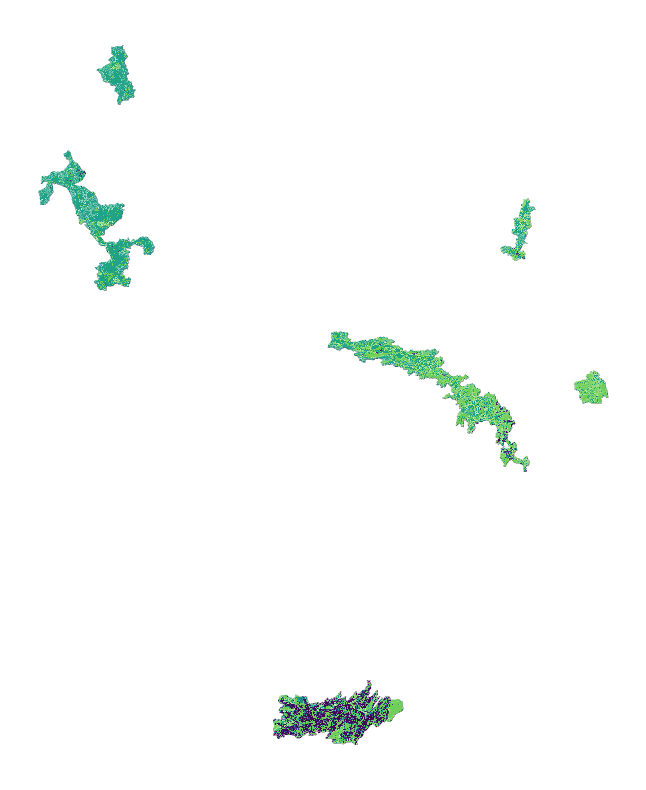

In [51]:

# Create the subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the chloropleth map
df.plot(column='DN', cmap='viridis', legend=False, ax=ax)

# Remove the axis and axis labels
ax.set_axis_off()




In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust as needed

# Assuming you have a function to create each bar chart and the choropleth map
for i, ax in enumerate(axs.flatten()):
    if i < 6:  # Replace with the number of bar charts
        create_bar_chart(ax, data[i])  # Replace with your function and data
    else:
        create_choropleth_map(ax, map_data)  # Replace with your function and data

plt.tight_layout()
plt.show()